# Plot weight matrices and distributions from the FAFB data
## Import necessary packages and define functions 

In [4]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd

In [2]:
# Load the weight matrices from a file
def LoadWMat(fname):

    # Load the weight matrices
    preNamesFull = []
    fullMatrix = []
    with open(fname, 'r') as file:
        postNamesFull = next(file).split()
        for row in file:
            cols = row.split()
            if fullMatrix == []:
                fullMatrix = list(map(float, cols[1:]))
            else:
                fullMatrix = np.vstack((fullMatrix,list(map(float, cols[1:]))))
            preNamesFull = preNamesFull + [cols[0]]
            
    return fullMatrix, preNamesFull, postNamesFull

# Get the different types in the list of names
def GetTypes(nronNames):
    
    nronTypes = [nronNames[0].split('-')[0]]
    for nronNow in nronNames:
        if not nronNow.split('-')[0][0] == 'R':
            if not nronNow.split('-')[0] in nronTypes:
                nronTypes = nronTypes + [nronNow.split('-')[0]]
        if nronNow.split('-')[0][0] == 'R':
            if not nronNow.split('-')[0][0] in nronTypes:
                nronTypes = nronTypes + [nronNow.split('-')[0][0]]
            
    return nronTypes

# Get a matrix for a subset of types out of the full matrix
def SubMatrix(types2pltPre, types2pltPost, fullMatrix, preNamesFull, postNamesFull):

    preNames = []
    postNames = []
    for typeNow in types2pltPre:
        for i,nronNow in enumerate(preNamesFull):
            if nronNow.split('-')[0] == typeNow:
                preNames = preNames + [nronNow]
    for typeNow in types2pltPost:
        for i,nronNow in enumerate(postNamesFull):
            if nronNow.split('-')[0] == typeNow:
                postNames = postNames + [nronNow]
    mat2plt = np.zeros((len(preNames),len(postNames)))
    for preNum,preNron in enumerate(preNamesFull):
        for postNum,postNron in enumerate(postNamesFull):
            if preNron in preNames and postNron in postNames:
                preLoc = [i for i,preNow in enumerate(preNames) if preNow == preNron]
                postLoc = [i for i,postNow in enumerate(postNames) if postNow == postNron]
                mat2plt[preLoc[0], postLoc[0]] = fullMatrix[preNum,postNum]
                
    return mat2plt, preNames, postNames

# Plot the weight matrices
def WeightMatrix( mat2plt, preNames, postNames, maxCts):

    ax = plt.gca()
    plt.imshow(mat2plt, cmap = plt.get_cmap('Reds'),vmin=0,vmax=maxCts)
    cbar = plt.colorbar()
    cbar.ax.set_ylabel("# of synapses",rotation=270,fontsize = 18)

    nronTypesPre = GetTypes(preNames)
    nronTypesPost = GetTypes(postNames)
    
    # Draw dividing lines
    preOffset = 0
    postOffset = 0
    for ln in range(0,len(nronTypesPre)-1):
        preIds = [i for i,preNow in enumerate(preNames) if preNow.split('-')[0] == nronTypesPre[ln]]
        preOffset = preOffset + len(preIds)
        plt.axhline(y = preOffset-0.5, color='r', linestyle='-', linewidth=0.5)
    for ln in range(0,len(nronTypesPost)-1):
        postIds = [i for i,postNow in enumerate(postNames) if postNow.split('-')[0] == nronTypesPost[ln]]
        postOffset = postOffset + len(postIds)
        plt.axvline(x = postOffset-0.5, color='r', linestyle='-', linewidth=0.5)

    ax.set_yticks(range(0,len(preNames)))
    ax.set_yticklabels(preNames)
    plt.ylabel('presynaptic')
    ax.set_xticks(range(0,len(postNames)))
    ax.set_xticklabels(postNames,rotation=90)
    plt.xlabel('postsynaptic')

    plt.tight_layout()
    plt.xlim(-0.5,len(postNames)-0.5)
    plt.ylim(-0.5,len(preNames)-0.5)
    
    return ax,plt

## Load and plot the data
### PB

C:\Users\turnerevansd\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


['PEN1', 'PEN2', 'EPG', 'PEG', 'D7']
['PEN1', 'PEN2', 'EPG', 'PEG', 'D7']


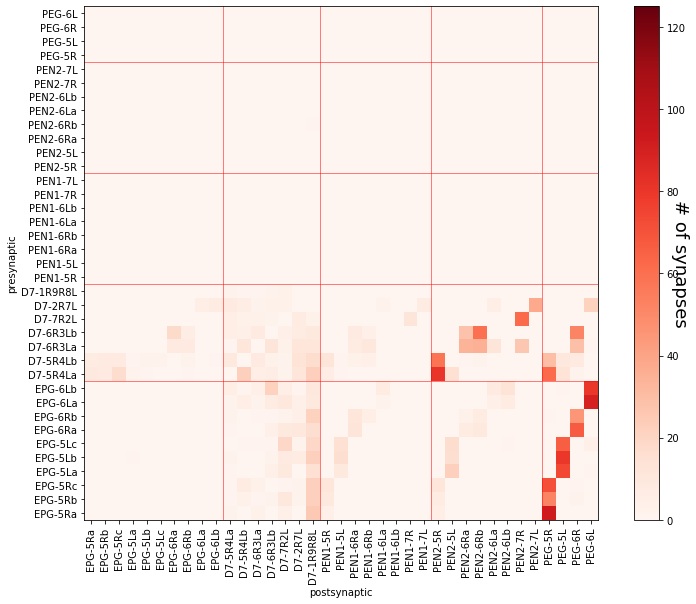

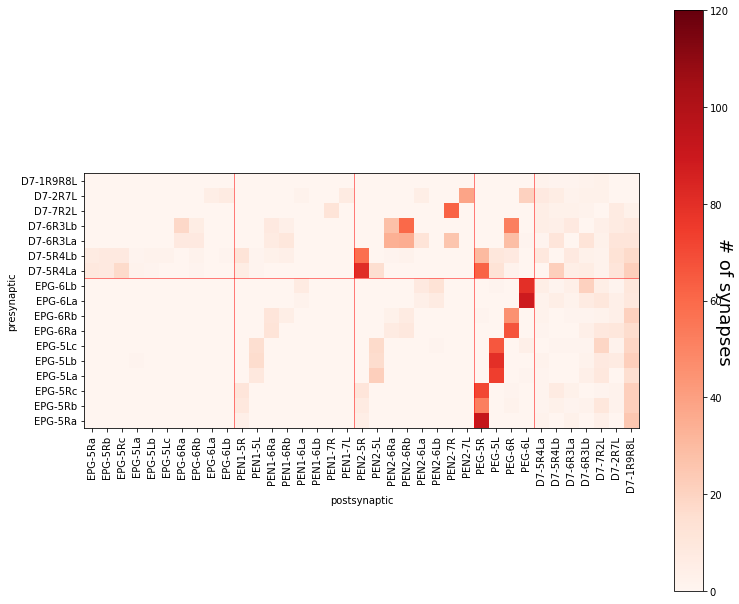

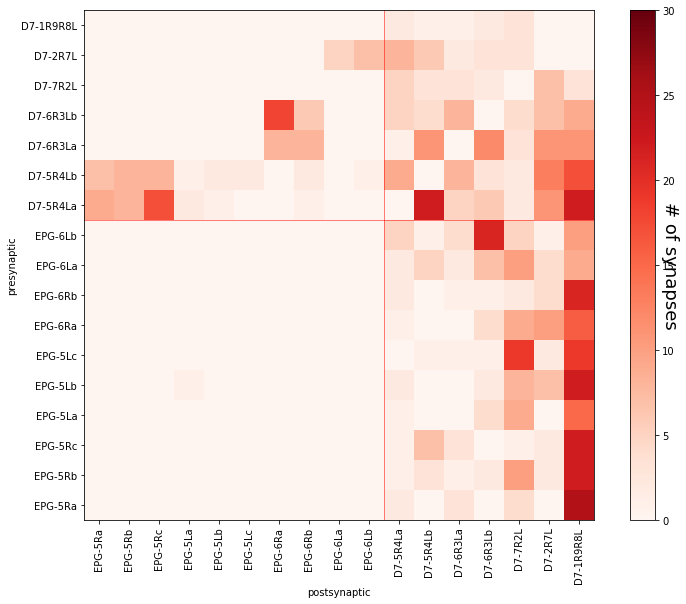

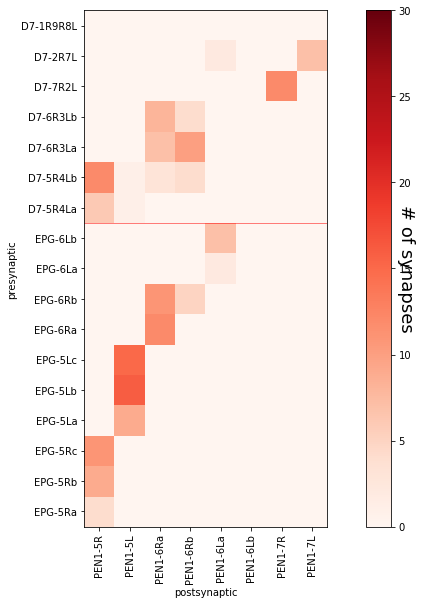

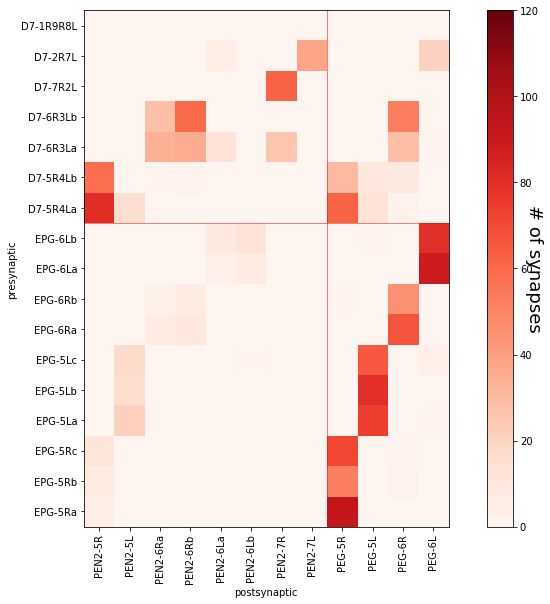

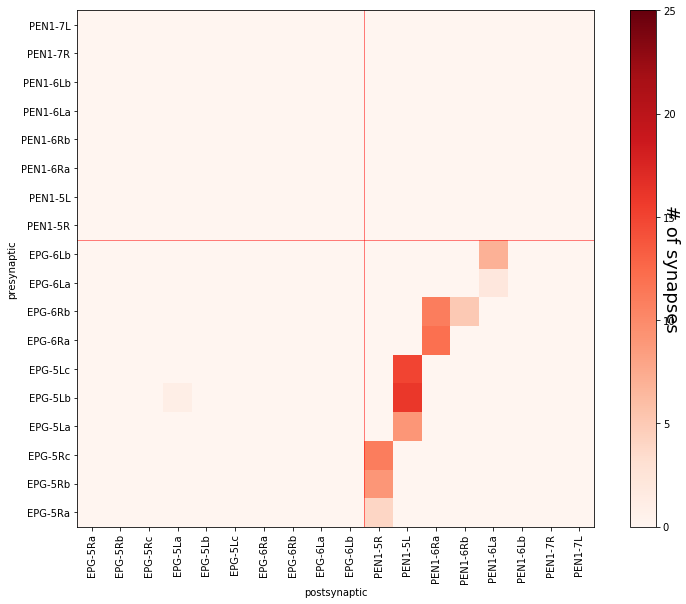

In [5]:
fname = 'connectivity_matrices\\matrix_PB.txt'

fullMatrix, preNamesFull, postNamesFull = LoadWMat(fname)
nronTypesPre = GetTypes(preNamesFull)
print(nronTypesPre)
nronTypesPost = GetTypes(postNamesFull)
print(nronTypesPost)

# Pull out subnames and weight matrices for a specified group of neuron types
types2pltPre = ['EPG','D7','PEN1','PEN2','PEG']
types2pltPost = ['EPG','D7','PEN1','PEN2','PEG']
mat2plt, preNames, postNames = SubMatrix(types2pltPre, types2pltPost,fullMatrix, preNamesFull, postNamesFull)

# Plot the weight matrix
fig = plt.figure(figsize=(11,8.5))
rcParams['svg.fonttype'] = 'none'
ax,plt = WeightMatrix( mat2plt, preNames, postNames, 125)
fig.savefig("plots\\WeightMatrix_PB_All.svg")

# Pull out subnames and weight matrices for a specified group of neuron types
types2pltPre = ['EPG','D7']
types2pltPost = ['EPG','PEN1','PEN2','PEG','D7']
mat2plt, preNames, postNames = SubMatrix(types2pltPre, types2pltPost,fullMatrix, preNamesFull, postNamesFull)

# Plot the weight matrix
fig = plt.figure(figsize=(11,8.5))
rcParams['svg.fonttype'] = 'none'
ax,plt = WeightMatrix( mat2plt, preNames, postNames, 120)
fig.savefig("plots\\WeightMatrix_PB_All_Reduced.svg")

# Pull out subnames and weight matrices for a specified group of neuron types
types2pltPre = ['EPG','D7']
types2pltPost = ['EPG','D7']
mat2plt, preNames, postNames = SubMatrix(types2pltPre, types2pltPost,fullMatrix, preNamesFull, postNamesFull)

# Plot the weight matrix
fig = plt.figure(figsize=(11,8.5))
rcParams['svg.fonttype'] = 'none'
ax,plt = WeightMatrix( mat2plt, preNames, postNames, 30)
fig.savefig("plots\\WeightMatrix_PB_EPGnD7.svg")

# Pull out subnames and weight matrices for a specified group of neuron types
types2pltPre = ['EPG','D7']
types2pltPost = ['PEN1']
mat2plt, preNames, postNames = SubMatrix(types2pltPre, types2pltPost,fullMatrix, preNamesFull, postNamesFull)

# Plot the weight matrix
fig = plt.figure(figsize=(11,8.5))
rcParams['svg.fonttype'] = 'none'
ax,plt = WeightMatrix( mat2plt, preNames, postNames, 30)
fig.savefig("plots\\WeightMatrix_PB_EPGnD7tPEN1.svg")

# Pull out subnames and weight matrices for a specified group of neuron types
types2pltPre = ['EPG','D7']
types2pltPost = ['PEN2','PEG']
mat2plt, preNames, postNames = SubMatrix(types2pltPre, types2pltPost,fullMatrix, preNamesFull, postNamesFull)

# Plot the weight matrix
fig = plt.figure(figsize=(11,8.5))
rcParams['svg.fonttype'] = 'none'
ax,plt = WeightMatrix( mat2plt, preNames, postNames, 120)
fig.savefig("plots\\WeightMatrix_PB_EPGnD7tPEN2nPEG.svg")


# Pull out subnames and weight matrices for a specified group of neuron types
types2pltPre = ['EPG','PEN1']
types2pltPost = ['EPG','PEN1']
mat2plt, preNames, postNames = SubMatrix(types2pltPre, types2pltPost,fullMatrix, preNamesFull, postNamesFull)

# Plot the weight matrix
fig = plt.figure(figsize=(11,8.5))
rcParams['svg.fonttype'] = 'none'
ax,plt = WeightMatrix( mat2plt, preNames, postNames, 25)
fig.savefig("plots\\WeightMatrix_PB_EPGnPEN1.svg")

### EB

C:\Users\turnerevansd\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


['PEN1', 'PEN2', 'EPG', 'PEG', 'R']
['PEN1', 'PEN2', 'EPG', 'PEG', 'R']


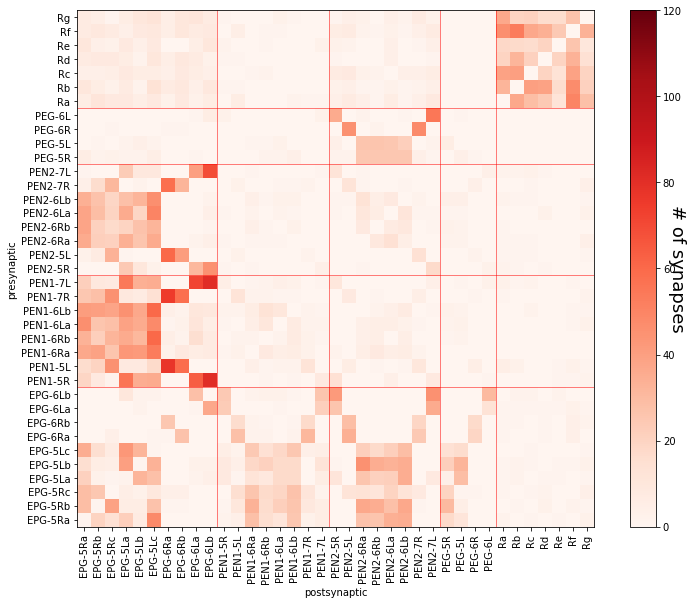

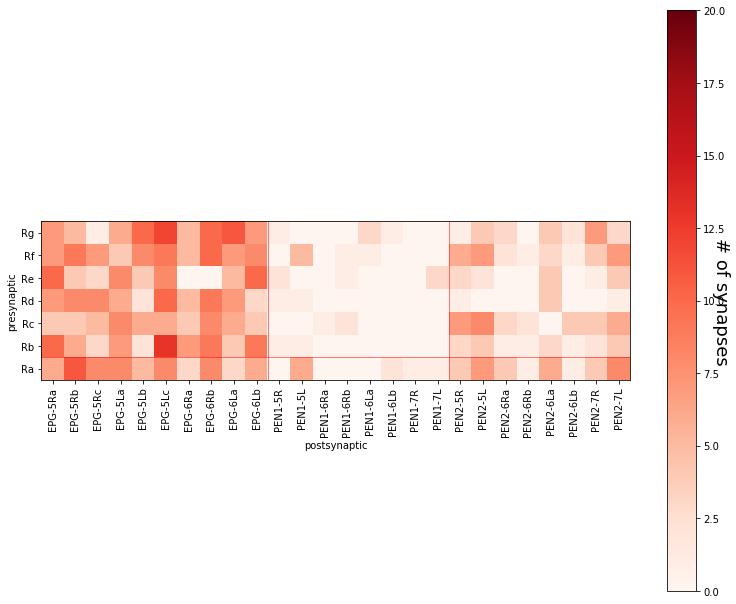

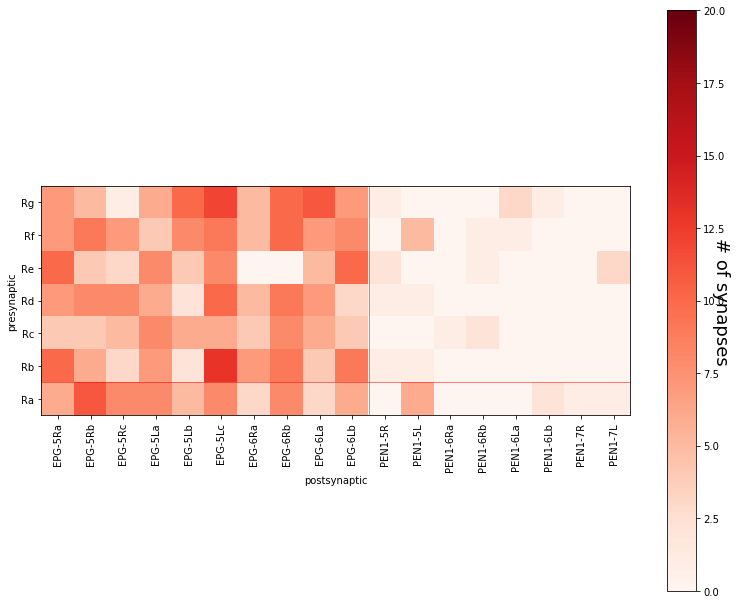

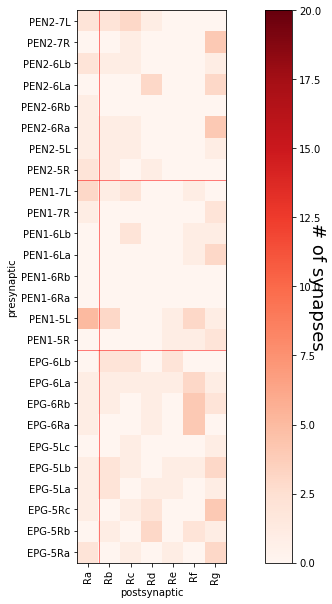

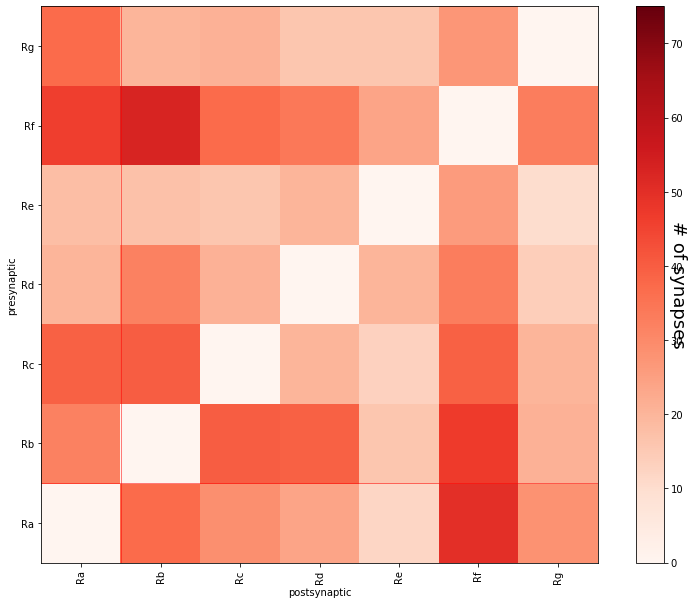

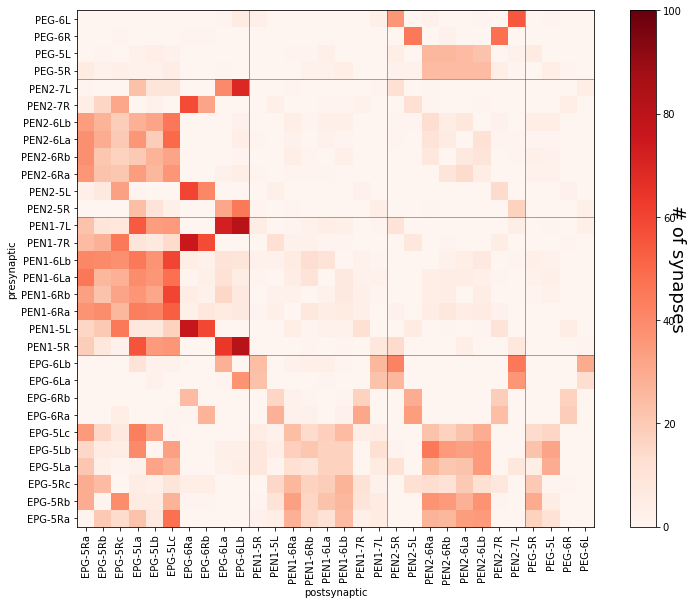

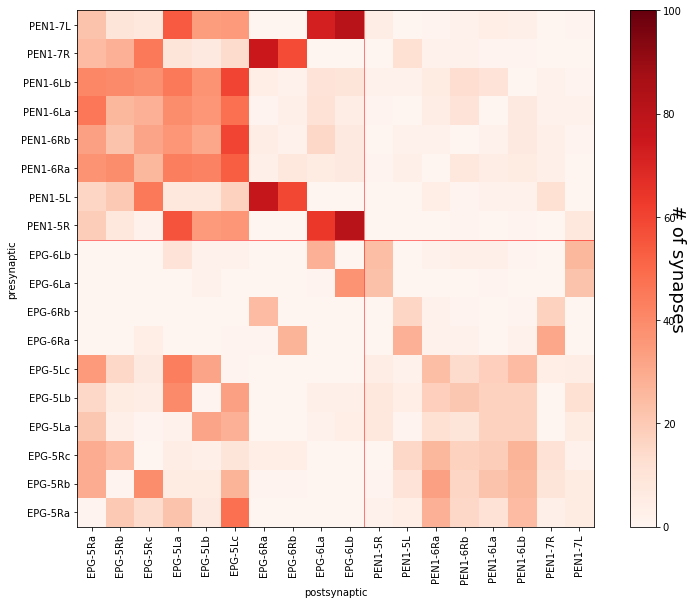

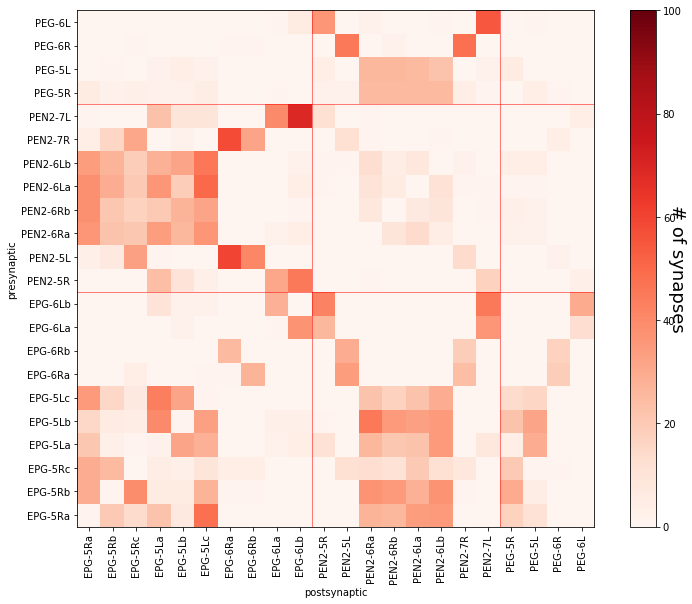

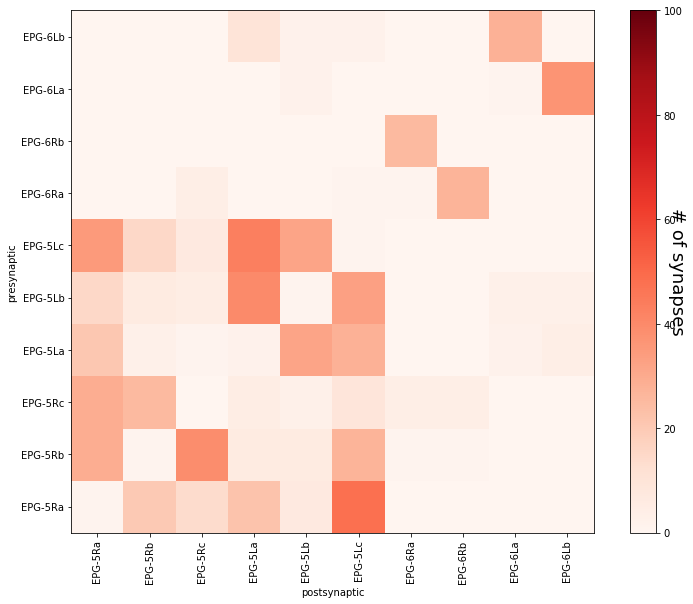

In [6]:
fname = 'connectivity_matrices\\matrix_EB.txt'

fullMatrix, preNamesFull, postNamesFull = LoadWMat(fname)
nronTypesPre = GetTypes(preNamesFull)
print(nronTypesPre)
nronTypesPost = GetTypes(postNamesFull)
print(nronTypesPost)

# Pull out subnames and weight matrices for a specified group of neuron types
types2pltPre = ['EPG','PEN1','PEN2','PEG', 'Ra', 'Rb', 'Rc', 'Rd', 'Re', 'Rf', 'Rg']
types2pltPost = ['EPG','PEN1','PEN2','PEG', 'Ra', 'Rb', 'Rc', 'Rd', 'Re', 'Rf', 'Rg']
mat2plt, preNames, postNames = SubMatrix(types2pltPre, types2pltPost,fullMatrix, preNamesFull, postNamesFull)

# Plot the weight matrix
fig = plt.figure(figsize=(11,8.5))
rcParams['svg.fonttype'] = 'none'
ax,plt = WeightMatrix( mat2plt, preNames, postNames, 120)
fig.savefig("plots\\WeightMatrix_EB_All.svg")

# Pull out subnames and weight matrices for a specified group of neuron types
types2pltPre = ['Ra', 'Rb', 'Rc', 'Rd', 'Re', 'Rf', 'Rg']
types2pltPost = ['EPG','PEN1','PEN2']
mat2plt, preNames, postNames = SubMatrix(types2pltPre, types2pltPost,fullMatrix, preNamesFull, postNamesFull)

# Plot the weight matrix
fig = plt.figure(figsize=(11,8.5))
rcParams['svg.fonttype'] = 'none'
ax,plt = WeightMatrix( mat2plt, preNames, postNames, 20)
fig.savefig("plots\\WeightMatrix_EB_ringPre.svg")

# Pull out subnames and weight matrices for a specified group of neuron types
types2pltPre = ['Ra', 'Rb', 'Rc', 'Rd', 'Re', 'Rf', 'Rg']
types2pltPost = ['EPG','PEN1']
mat2plt, preNames, postNames = SubMatrix(types2pltPre, types2pltPost,fullMatrix, preNamesFull, postNamesFull)

# Plot the weight matrix
fig = plt.figure(figsize=(11,8.5))
rcParams['svg.fonttype'] = 'none'
ax,plt = WeightMatrix( mat2plt, preNames, postNames, 20)
fig.savefig("plots\\WeightMatrix_EB_ringPreEPGsPEN1s.svg")

# Pull out subnames and weight matrices for a specified group of neuron types
types2pltPre = ['EPG','PEN1','PEN2']
types2pltPost = ['Ra', 'Rb', 'Rc', 'Rd', 'Re', 'Rf', 'Rg']
mat2plt, preNames, postNames = SubMatrix(types2pltPre, types2pltPost,fullMatrix, preNamesFull, postNamesFull)

# Plot the weight matrix
fig = plt.figure(figsize=(11,8.5))
rcParams['svg.fonttype'] = 'none'
ax,plt = WeightMatrix( mat2plt, preNames, postNames, 20)
fig.savefig("plots\\WeightMatrix_EB_ringPost.svg")

# Pull out subnames and weight matrices for a specified group of neuron types
types2pltPre = ['Ra', 'Rb', 'Rc', 'Rd', 'Re', 'Rf', 'Rg']
types2pltPost = ['Ra', 'Rb', 'Rc', 'Rd', 'Re', 'Rf', 'Rg']
mat2plt, preNames, postNames = SubMatrix(types2pltPre, types2pltPost,fullMatrix, preNamesFull, postNamesFull)

# Plot the weight matrix
fig = plt.figure(figsize=(11,8.5))
rcParams['svg.fonttype'] = 'none'
ax,plt = WeightMatrix( mat2plt, preNames, postNames, 75)
fig.savefig("plots\\WeightMatrix_EB_ring2ring.svg")

# Pull out subnames and weight matrices for a specified group of neuron types
types2pltPre = ['EPG','PEN1','PEN2','PEG']
types2pltPost = ['EPG','PEN1','PEN2','PEG']
mat2plt, preNames, postNames = SubMatrix(types2pltPre, types2pltPost,fullMatrix, preNamesFull, postNamesFull)

# Plot the weight matrix
fig = plt.figure(figsize=(11,8.5))
rcParams['svg.fonttype'] = 'none'
ax,plt = WeightMatrix( mat2plt, preNames, postNames, 100)
fig.savefig("plots\\WeightMatrix_EB_Col.svg")

# Pull out subnames and weight matrices for a specified group of neuron types
types2pltPre = ['EPG','PEN1']
types2pltPost = ['EPG','PEN1']
mat2plt, preNames, postNames = SubMatrix(types2pltPre, types2pltPost,fullMatrix, preNamesFull, postNamesFull)

# Plot the weight matrix
fig = plt.figure(figsize=(11,8.5))
rcParams['svg.fonttype'] = 'none'
ax,plt = WeightMatrix( mat2plt, preNames, postNames, 100)
fig.savefig("plots\\WeightMatrix_EB_EPGwPEN1.svg")

# Pull out subnames and weight matrices for a specified group of neuron types
types2pltPre = ['EPG','PEN2','PEG']
types2pltPost = ['EPG','PEN2','PEG']
mat2plt, preNames, postNames = SubMatrix(types2pltPre, types2pltPost,fullMatrix, preNamesFull, postNamesFull)

# Plot the weight matrix
fig = plt.figure(figsize=(11,8.5))
rcParams['svg.fonttype'] = 'none'
ax,plt = WeightMatrix( mat2plt, preNames, postNames, 100)
fig.savefig("plots\\WeightMatrix_EB_EPGwPEN2wPEG.svg")

# Pull out subnames and weight matrices for a specified group of neuron types
types2pltPre = ['EPG']
types2pltPost = ['EPG']
mat2plt, preNames, postNames = SubMatrix(types2pltPre, types2pltPost,fullMatrix, preNamesFull, postNamesFull)

# Plot the weight matrix
fig = plt.figure(figsize=(11,8.5))
rcParams['svg.fonttype'] = 'none'
ax,plt = WeightMatrix( mat2plt, preNames, postNames, 100)
fig.savefig("plots\\WeightMatrix_EB_EPG2EPG.svg")

In [7]:
# Extract individual weights between partners from the weight matrix
def nronWeights(WMat, matNames, preName, postName):
    preInds = []
    postInds = []
    for i,s in enumerate(matNames):
        if preName in s:
            preInds = preInds +[i]
        if postName in s:
            postInds = postInds +[i]
            
    return WMat[preInds,:][:,postInds]

C:\Users\turnerevansd\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


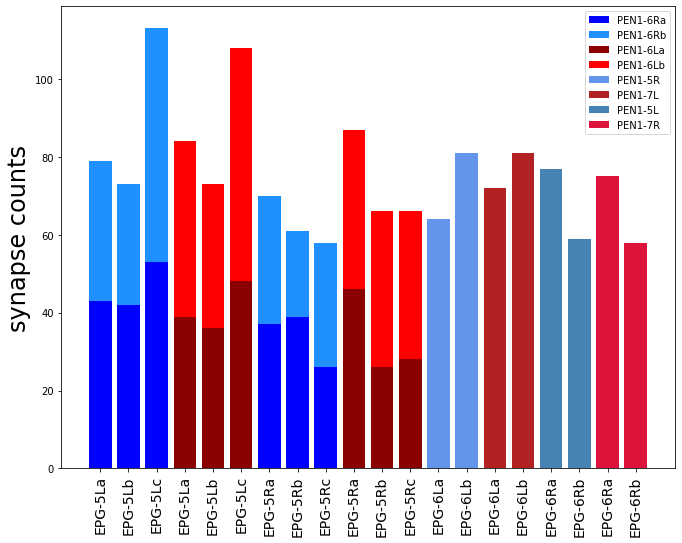

In [8]:
# Plot the P-EN1 to EPG weights
fname = 'connectivity_matrices\\matrix_EB.txt'

fullMatrix, preNamesFull, postNamesFull = LoadWMat(fname)

# For the E-PGs, count the number of P-EN1 or P-EN2 partners and sum their total inputs
wmat1 = nronWeights(fullMatrix,preNamesFull,"PEN1-6R","EPG-5L")        
wmat2 = nronWeights(fullMatrix,preNamesFull,"PEN1-6L","EPG-5L")        
wmat3 = nronWeights(fullMatrix,preNamesFull,"PEN1-6R","EPG-5R")        
wmat4 = nronWeights(fullMatrix,preNamesFull,"PEN1-6L","EPG-5R")        
wmat5 = nronWeights(fullMatrix,preNamesFull,"PEN1-5R","EPG-6L")        
wmat6 = nronWeights(fullMatrix,preNamesFull,"PEN1-7L","EPG-6L")
wmat7 = nronWeights(fullMatrix,preNamesFull,"PEN1-5L","EPG-6R")        
wmat8 = nronWeights(fullMatrix,preNamesFull,"PEN1-7R","EPG-6R")

fig = plt.figure(figsize=(11,8.5))
ax = plt.subplot()
rcParams['svg.fonttype'] = 'none'
p1 = plt.bar(range(0,3),wmat1[0,:],color='blue',label='PEN1-6Ra')
p2 = plt.bar(range(0,3),wmat1[1,],color='dodgerblue',bottom = wmat1[0,:],label='PEN1-6Rb')
plt.bar(range(3,6),wmat2[0,:],color='darkred',label='PEN1-6La')
plt.bar(range(3,6),wmat2[1,],color='red',bottom = wmat2[0,:],label='PEN1-6Lb')
plt.bar(range(6,9),wmat3[0,:],color='blue')
plt.bar(range(6,9),wmat3[1,],color='dodgerblue',bottom = wmat3[0,:])
plt.bar(range(9,12),wmat4[0,:],color='darkred')
plt.bar(range(9,12),wmat4[1,],color='red',bottom = wmat4[0,:])
p3 = plt.bar(range(12,14),wmat5[0,:],color='cornflowerblue',label='PEN1-5R')
p4 = plt.bar(range(14,16),wmat6[0,:],color='firebrick',label='PEN1-7L')
p5 = plt.bar(range(16,18),wmat7[0,:],color='steelblue',label='PEN1-5L')
p6 = plt.bar(range(18,20),wmat8[0,:],color='crimson',label='PEN1-7R')
EPGNames = ['EPG-5La','EPG-5Lb','EPG-5Lc','EPG-5La','EPG-5Lb','EPG-5Lc','EPG-5Ra','EPG-5Rb','EPG-5Rc','EPG-5Ra','EPG-5Rb','EPG-5Rc','EPG-6La','EPG-6Lb','EPG-6La','EPG-6Lb','EPG-6Ra','EPG-6Rb','EPG-6Ra','EPG-6Rb']
plt.xticks(range(0, 20),EPGNames,fontsize = 14,rotation=90)
ax.set_ylabel('synapse counts',fontsize=24)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
fig.savefig("plots\\PEN1ToEPGSynapses_EB.svg")

# run a t-test


In [9]:
from scipy import stats

syns2 = np.append(sum(wmat1),np.append(sum(wmat2),np.append(sum(wmat3),sum(wmat4))))
syns1 = np.append(wmat5,np.append(wmat6,np.append(wmat7,wmat8)))

twosample_results = stats.ttest_ind(syns2, syns1)

display(twosample_results)

Ttest_indResult(statistic=1.0786121686756733, pvalue=0.29500324351950385)

### NO

C:\Users\turnerevansd\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


['PEN1', 'PEN2']
['PEN1', 'PEN2']


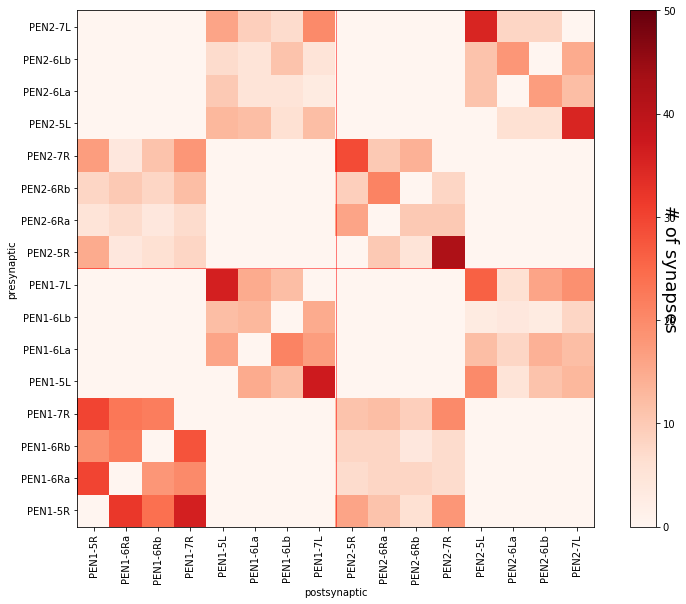

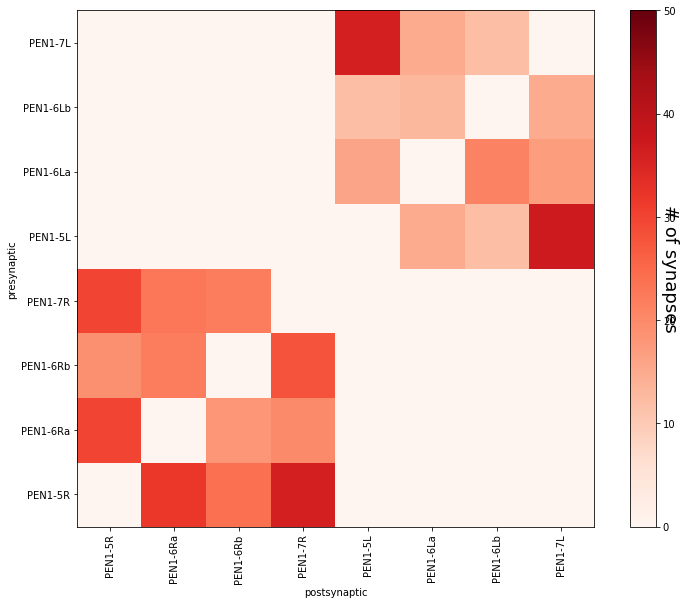

In [11]:
fname = 'connectivity_matrices\\matrix_NO.txt'

fullMatrix, preNamesFull, postNamesFull = LoadWMat(fname)
nronTypesPre = GetTypes(preNamesFull)
print(nronTypesPre)
nronTypesPost = GetTypes(postNamesFull)
print(nronTypesPost)

newNamesPre = []
newMatPre = []
for i,rs in enumerate(preNamesFull):
    if 'R' in rs.split('-')[1]:
        newNamesPre = newNamesPre + [rs]
        newMatPre = newMatPre + [i]
for i,ls in enumerate(preNamesFull):
    if 'L' in ls.split('-')[1]:
        newNamesPre = newNamesPre + [ls]
        newMatPre = newMatPre + [i]

newNamesPost = []
newMatPost = []
for i,rs in enumerate(postNamesFull):
    if 'R' in rs.split('-')[1]:
        newNamesPost = newNamesPost + [rs]
        newMatPost = newMatPost + [i]
for i,ls in enumerate(postNamesFull):
    if 'L' in ls.split('-')[1]:
        newNamesPost = newNamesPost + [ls]
        newMatPost = newMatPost + [i]
        
newMat = np.zeros(np.shape(fullMatrix))
for i,iNewPre in enumerate(newMatPre):
    for j,jNewPost in enumerate(newMatPost):
        newMat[i,j] = fullMatrix[iNewPre,jNewPost]
        
# Pull out subnames and weight matrices for a specified group of neuron types
types2pltPre = ['PEN1','PEN2']
types2pltPost = ['PEN1','PEN2']
mat2plt, preNames, postNames = SubMatrix(types2pltPre, types2pltPost,newMat, newNamesPre, newNamesPost)

# Plot the weight matrix
fig = plt.figure(figsize=(11,8.5))
rcParams['svg.fonttype'] = 'none'
ax,plt = WeightMatrix( mat2plt, preNames, postNames, 50)

fig.savefig("plots\\WeightMatrix_NO_All.svg")

# Pull out subnames and weight matrices for a specified group of neuron types
types2pltPre = ['PEN1']
types2pltPost = ['PEN1']
mat2plt, preNames, postNames = SubMatrix(types2pltPre, types2pltPost,newMat, newNamesPre, newNamesPost)

# Plot the weight matrix
fig = plt.figure(figsize=(11,8.5))
rcParams['svg.fonttype'] = 'none'
ax,plt = WeightMatrix( mat2plt, preNames, postNames, 50)

fig.savefig("plots\\WeightMatrix_NO_PEN1.svg")

### Theoretical weight matrix vs. Extrapolated weight matrix

In [12]:
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

C:\Users\turnerevansd\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


['EPG', 'PEN1', 'D7']
['EPG', 'PEN1', 'D7']


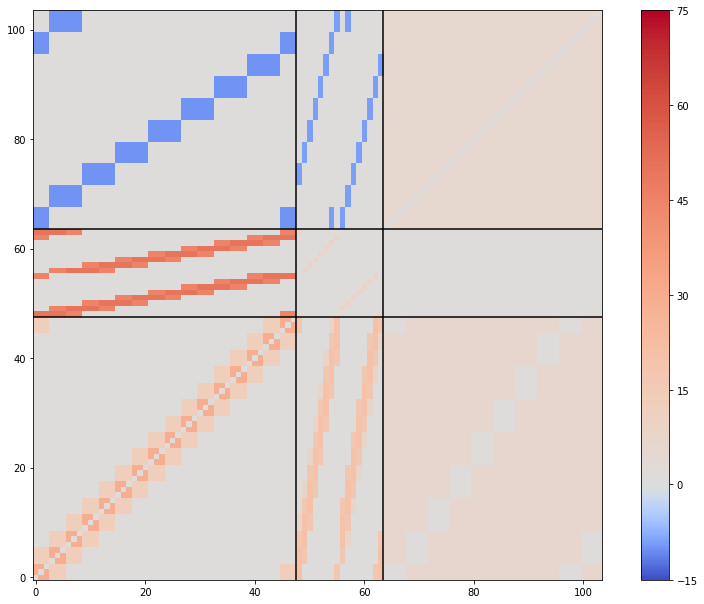

In [13]:
fname = 'connectivity_matrices\\PB_EB_extrapolated.txt'

# Load the weight matrix
preNamesFull = []
fullMatrix = []
with open(fname, 'r') as file:
    postNamesFull = next(file).split()
    for row in file:
        cols = row.split()
        if fullMatrix == []:
            fullMatrix = list(map(float, cols[1:]))
        else:
            fullMatrix = np.vstack((fullMatrix,list(map(float, cols[1:]))))
        preNamesFull = preNamesFull + [cols[0]]
            
nronTypesPre = GetTypes(preNamesFull)
print(nronTypesPre)
nronTypesPost = GetTypes(postNamesFull)
print(nronTypesPost)

# Make the inhibitory synapses negative
preInhibLocs = [i for i, val in enumerate(preNamesFull) if 'D7' in val]
postInhibLocs = [i for i, val in enumerate(postNamesFull) if 'EPG' in val or 'PEN1' in val]
for preLoc in preInhibLocs:
    for postLoc in postInhibLocs:
        fullMatrix[preLoc,postLoc] = -fullMatrix[preLoc,postLoc]

# Correct the P-EN ordering

        
        
# Plot the weight matrix
fig = plt.figure(figsize=(11,8.5))
rcParams['svg.fonttype'] = 'none'
norm = MidpointNormalize(midpoint=0,vmin=-15,vmax=75)
plt.imshow(fullMatrix, norm = norm, cmap = plt.get_cmap('coolwarm'))
cbar = plt.colorbar()
cbar.set_ticks([-15,0,15,30,45,60,75])
plt.tight_layout()
plt.tight_layout()

plt.xlim(-0.5,len(preNamesFull)-0.5)
plt.ylim(-0.5,len(postNamesFull)-0.5)

preLineOffset = -0.5
for preLine in range(0,len(nronTypesPre)-1):
    preLineOffset = preLineOffset + len([i for i, val in enumerate(preNamesFull) if nronTypesPre[preLine] in val])
    plt.axhline(y=preLineOffset,color='k')
postLineOffset = -0.5
for postLine in range(0,len(nronTypesPost)-1):
    postLineOffset = postLineOffset + len([i for i, val in enumerate(postNamesFull) if nronTypesPost[postLine] in val])
    plt.axvline(x=postLineOffset,color='k')
fig.savefig("plots\\ExtrapolatedSynapses.svg")

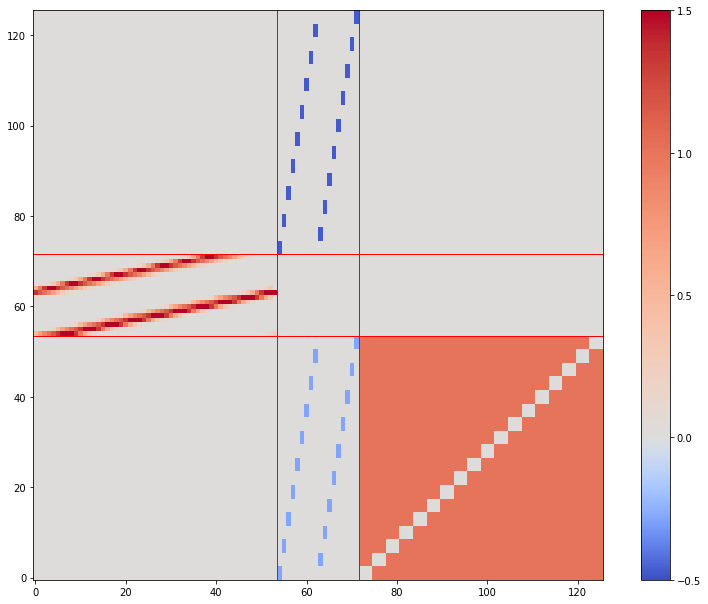

In [14]:
# Add D7s to Herve's weight matrix
# Generate a weight matrix a la Herve
# number of neurons per neuron type
nEPG = 54
nPEN = 9
nD7 = 54;
EperP = int(nEPG/nPEN/2)
EperD = int(nEPG/nD7)
DperP = int(nD7/nPEN/2)

# Specify angles for each glomerulus
glomAngs = np.linspace(0,2*np.pi,nEPG+1)
glomAngs = np.delete(glomAngs,nEPG)

# Define a weight matrix for each set of connections
allWs = np.zeros([nEPG+2*nPEN+nD7,nEPG+2*nPEN+nD7])

# Create the E-PG to P-EN weights
alpha = 10 #weight multiplier for the direct E-PG to P-EN connections (and vice versa)
beta = 25 # weight multiplier for inhibitory  E-PG to P-EN connections

allWs[0:EperP,nEPG]=allWs[EperP-1,nEPG]-beta/nEPG+alpha/nEPG
allWs[EperP:2*EperP,nEPG+nPEN]=allWs[nPEN*EperP:nPEN*EperP+EperP,nEPG+nPEN]-beta/nEPG+alpha/nEPG
for it in range(1,nPEN):
    allWs[0:nEPG,nEPG+it] = np.roll(allWs[0:nEPG,nEPG+it-1],2*EperP)
    allWs[0:nEPG,nEPG+nPEN+it] = np.roll(allWs[0:nEPG,nEPG+nPEN+it-1],2*EperP)

from scipy.stats import vonmises

# Create the P-EN to E-PG weights
anatShift = 34*(nPEN/360)
kappa = 12

rXn = alpha*(0.5*vonmises.pdf(glomAngs-(0.5*2*np.pi/nPEN-np.pi/nEPG), kappa)+
             vonmises.pdf(glomAngs-((0.5+anatShift)*2*np.pi/nPEN - np.pi/nEPG),kappa))
allWs[nEPG,0:nEPG] = rXn/nPEN
lXn = alpha*(0.5*vonmises.pdf(glomAngs-(0.5*2*np.pi/nPEN-np.pi/nEPG), kappa)+
             vonmises.pdf(glomAngs-((0.5-anatShift)*2*np.pi/nPEN - np.pi/nEPG),kappa))
allWs[nEPG+nPEN,0:nEPG] = lXn/nPEN

for it in range(1,nPEN):
    allWs[nEPG+it,0:nEPG-1] = np.roll(allWs[nEPG+it-1,0:nEPG-1],2*EperP-1)
    allWs[nEPG+nPEN+it,0:nEPG-1] = np.roll(allWs[nEPG+nPEN+it-1,0:nEPG-1],2*EperP-1)

# Add the Delta 7s
beta = 25 # weight multiplier for inhibitory  E-PG to P-EN connections
allWs[0:nEPG,nEPG+2*nPEN:nEPG+2*nD7] = 1
for it in range(0,2*nPEN):
    allWs[DperP*it:DperP*(it+1),nEPG+2*nPEN+DperP*it:nEPG+2*nPEN+DperP*(it+1)] = 0
for it in range(0,nPEN):
    allWs[nEPG+2*nPEN+DperP*2*it:nEPG+2*nPEN+DperP*(2*it+1),nEPG+it] = -beta/nEPG*EperD
    allWs[nEPG+2*nPEN+DperP*(2*it+1):nEPG+2*nPEN+DperP*(2*it+2),nEPG+nPEN+it] = -beta/nEPG*EperD
#-beta/nEPG


fig = plt.figure(figsize=(11,8.5))
ax = plt.gca()
norm = MidpointNormalize(midpoint=0,vmin=-0.5,vmax=1.5)
plt.imshow(allWs, norm = norm, cmap = plt.get_cmap('coolwarm'))
#plt.imshow(connMatEB_TEM[np.ix_(rng,rng)], cmap = plt.get_cmap('magma'),vmin=0,vmax=110)
cbar = plt.colorbar()
cbar.set_ticks([-0.5,0,0.5,1,1.5])
plt.tight_layout()
plt.tight_layout()
plt.xlim(-0.5,nEPG+2*nPEN+nD7-0.5)
plt.ylim(-0.5,nEPG+2*nPEN+nD7-0.5)
plt.plot([-0.5, nEPG+2*nPEN+nD7-0.5],
         [nEPG-0.5, nEPG-0.5],
         color='r', linestyle='-', linewidth=1)
plt.plot([-0.5, nEPG+2*nPEN+nD7-0.5],
         [nEPG+2*nPEN-0.5, nEPG+2*nPEN-0.5],
         color='r', linestyle='-', linewidth=1)
plt.plot([nEPG-0.5, nEPG-0.5],
         [-0.5, nEPG+2*nPEN+nD7-0.5],
         color='r', linestyle='-', linewidth=1)
plt.plot([nEPG+2*nPEN-0.5, nEPG+2*nPEN-0.5],
         [-0.5, nEPG+2*nPEN+nD7-0.5],
         color='r', linestyle='-', linewidth=1)
fig.savefig("plots\\ModelWeights.svg")